# Analysis: Airline delays in the US

In [1]:
import pandas as pd

In [2]:
# Load file (this machine can't handle more)
df = pd.read_csv("2018.csv")

In [3]:
# Let's get familiar with the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
FL_DATE                object
OP_CARRIER             object
OP_CARRIER_FL_NUM      int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtypes: float64(20), int64(3),

In [4]:
# 7.2M records and 28 columns
# We have (technical) data on airlines, airport, flight number, etc
# Pretty much all other data is time-related (in minutes)

In [5]:
# Set to see all columns
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check unique values in OP_CARRIER (airline) column
df.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [8]:
# Renaming airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [9]:
# Quality check
df.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

# Canceled flights exploration

In [10]:
# Total number of canceled flights
df.CANCELLED.sum()

116584.0

In [11]:
# Let's explore column CANCELLED
df.CANCELLED.unique()

array([0., 1.])

In [12]:
# From above we see it's binary: 0 or 1, let's see how it looks like
canceled = df[(df['CANCELLED'] > 0)]

In [13]:
canceled.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
178,2018-01-01,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1.0,B,0.0,81.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN
875,2018-01-01,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1.0,A,0.0,102.0,NaN,NaN,414.0,NaN,NaN,NaN,NaN,NaN,NaN
1244,2018-01-01,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1.0,B,0.0,78.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN


# Conclusion
- Canceled flights are not delayed flights
- If canceled, the flight didn't happen, and values are NaN
- We can filter out Canceled Flights for out analysis
- DEP_DELAY Actual Departure Time
- ARR_DELAY Total Delay on Arrival in minutes
- If both of these numbers are negative =>> there was no delay

In [14]:
# OPTIONAL: Leaving only non-canceled flights
# df = df[(df['CANCELLED'] == 0)]

# Departure delay and Arrival delay exploration

In [15]:
# Departure delay data (in minutes)
df.DEP_DELAY.head()

0    -5.0
1    -8.0
2    -5.0
3     6.0
4    20.0
Name: DEP_DELAY, dtype: float64

In [16]:
# Arrival delay data (in minutes)
df.ARR_DELAY.head()

0   -23.0
1   -24.0
2   -13.0
3    -2.0
4    14.0
Name: ARR_DELAY, dtype: float64

- If a number is positive = flight delayed
- Since that we're exploring only delayed flights, non-delayed should be disregarded
- The danger of keeping those is if we summarise for plotting for example, we'll get false data
- Sum of Delayed minutes will be less because of the negative numbers that will subtract the real delays
- BUT
- Let's first define what a delayed flight is:
- A Delayed flight is a flight that arrives late at its destination
- Flight can be delayed on departure but still, arrive on time = not a delayed flight

In [17]:
# To do this analysis right, let's filter all negative numbers in ARR_DELAY column
# Number of delayed flights 
df[df.ARR_DELAY > 0 ].count()

FL_DATE                2516050
OP_CARRIER             2516050
OP_CARRIER_FL_NUM      2516050
ORIGIN                 2516050
DEST                   2516050
CRS_DEP_TIME           2516050
DEP_TIME               2516050
DEP_DELAY              2514853
TAXI_OUT               2516050
WHEELS_OFF             2516050
WHEELS_ON              2516050
TAXI_IN                2516050
CRS_ARR_TIME           2516050
ARR_TIME               2516050
ARR_DELAY              2516050
CANCELLED              2516050
CANCELLATION_CODE            0
DIVERTED               2516050
CRS_ELAPSED_TIME       2516050
ACTUAL_ELAPSED_TIME    2516049
AIR_TIME               2516049
DISTANCE               2516050
CARRIER_DELAY          1352710
WEATHER_DELAY          1352710
NAS_DELAY              1352710
SECURITY_DELAY         1352710
LATE_AIRCRAFT_DELAY    1352710
Unnamed: 27                  0
dtype: int64

In [18]:
# Filter out non-delayed flights < 0 DEP_DELAY
df = df[(df['ARR_DELAY'] > 0)]

In [30]:
# Minutes to hours 
df['ARR_DELAY'] = df['ARR_DELAY'] / 60

# Minutes to hours 
df['DEP_DELAY'] = df['DEP_DELAY'] / 60

In [19]:
# Down from 7.2 to 2.5 million (relevant) records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516050 entries, 4 to 7213444
Data columns (total 28 columns):
FL_DATE                object
OP_CARRIER             object
OP_CARRIER_FL_NUM      int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtypes: float64(20), int64(3),

# DateTime data manipulation

In [20]:
# Check if FL_DATE is DateTime type
type(df['FL_DATE'])

pandas.core.series.Series

In [21]:
# Convert string to DateTime
pd.to_datetime(df.FL_DATE)

4         2018-01-01
11        2018-01-01
14        2018-01-01
15        2018-01-01
16        2018-01-01
17        2018-01-01
20        2018-01-01
24        2018-01-01
27        2018-01-01
39        2018-01-01
56        2018-01-01
61        2018-01-01
62        2018-01-01
63        2018-01-01
66        2018-01-01
68        2018-01-01
69        2018-01-01
71        2018-01-01
73        2018-01-01
78        2018-01-01
80        2018-01-01
84        2018-01-01
87        2018-01-01
92        2018-01-01
93        2018-01-01
98        2018-01-01
104       2018-01-01
110       2018-01-01
111       2018-01-01
113       2018-01-01
             ...    
7213372   2018-12-31
7213374   2018-12-31
7213376   2018-12-31
7213377   2018-12-31
7213379   2018-12-31
7213389   2018-12-31
7213390   2018-12-31
7213391   2018-12-31
7213392   2018-12-31
7213396   2018-12-31
7213398   2018-12-31
7213399   2018-12-31
7213401   2018-12-31
7213402   2018-12-31
7213403   2018-12-31
7213404   2018-12-31
7213406   201

In [22]:
# Month variable
df['FL_DATE_month'] = pd.to_datetime(df['FL_DATE']).dt.month
# Weekday variable
df['FL_DATE_weekday'] = pd.to_datetime(df['FL_DATE']).dt.weekday_name

# Data Visualisation

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

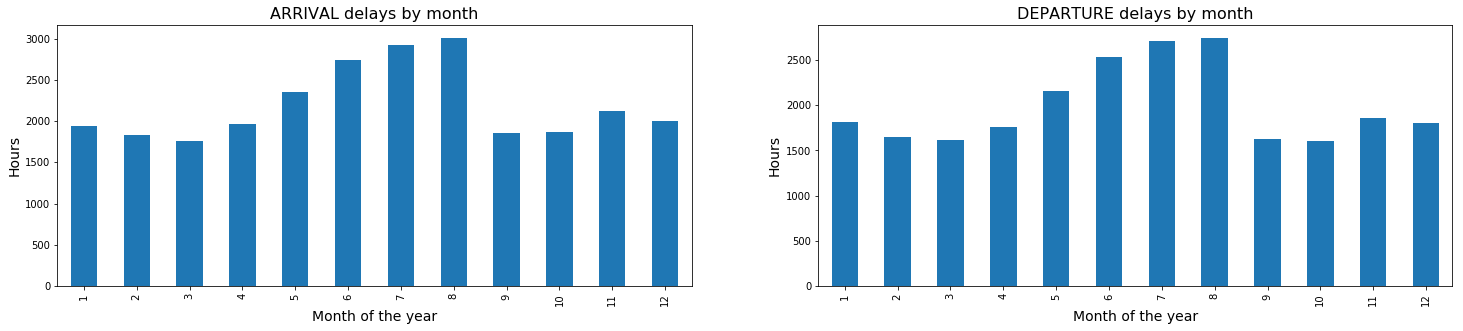

In [36]:
# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

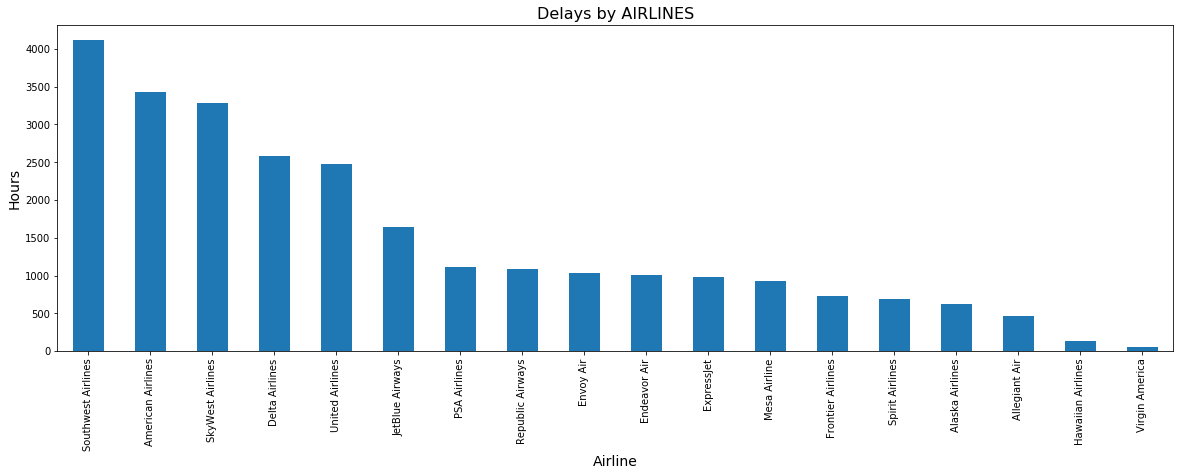

In [34]:
# Delays by airlines
plt.figure(figsize=(20, 6))
df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

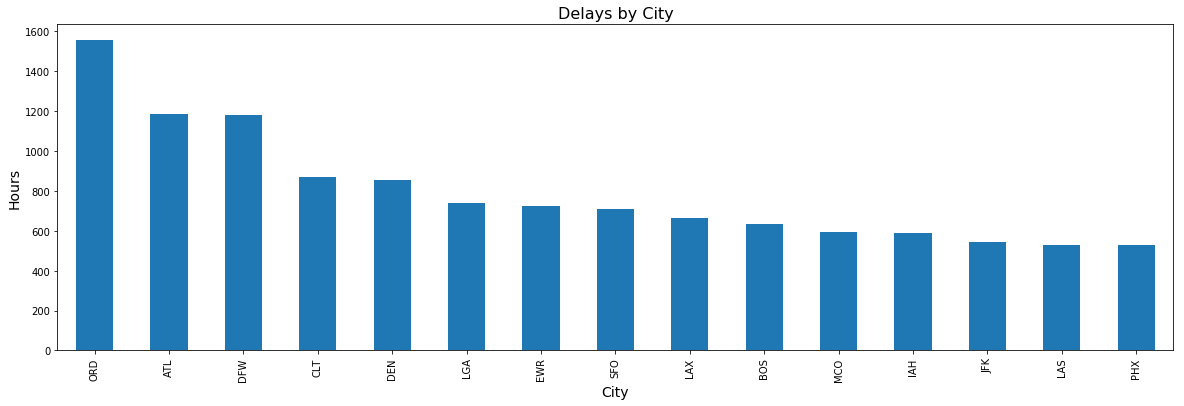

In [35]:
# Delays by City
city_by_delay = df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()